<a href="https://colab.research.google.com/github/youssef893/Detect_hand_written_Digits/blob/main/cnn_model_for_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youssef Sayed 20180342
# Ahmed Mostafa 20180031
# Eslam Sameh 201080045 

In [1]:
from keras.datasets import mnist
from sklearn.utils import shuffle
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from mlxtend.data import loadlocal_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
# x_train, y_train, x_valid, y_valid = train_test_split(x_train, y_train)

In [4]:
cnn = Sequential()
# first conv layer
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)))
# second layer
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))  # filters is number of filters & kernel size is size of filter
# max pooling layer
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten layer
cnn.add(Flatten())
# Fully connected layer
cnn.add(Dense(512, activation="relu"))
cnn.add(Dense(10, activation="softmax"))

In [5]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn.fit(x_train, to_categorical(y_train), epochs=15, batch_size=128,
        validation_data=(x_test, to_categorical(y_test)))
cnn.save("cnn.h5")

Epoch 1/15
469/469 [==============================] - 21s 15ms/step - loss: 0.3825 - accuracy: 0.9210 - val_loss: 0.0395 - val_accuracy: 0.9860
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0334 - val_accuracy: 0.9891
Epoch 3/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 4/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0259 - val_accuracy: 0.9917
Epoch 5/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0226 - val_accuracy: 0.9918
Epoch 6/15
469/469 [==============================] - 6s 14ms/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0314 - val_accuracy: 0.9920
Epoch 7/15
469/469 [==============================] - 7s 14ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0353 - val_accuracy: 0.989

In [6]:
prediction = cnn.predict(x_test)
score = cnn.evaluate(x_test, to_categorical(y_test), verbose=0)
print("accuracy CNN", score[1])
prediction = np.argmax(prediction, axis=1)

accuracy CNN 0.9916999936103821


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix = confusion_matrix(prediction, y_test)

In [9]:
print(classification_report(prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       985
           1       1.00      0.99      0.99      1142
           2       1.00      0.99      0.99      1036
           3       1.00      0.99      0.99      1020
           4       0.99      1.00      0.99       970
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       953
           7       0.99      0.99      0.99      1020
           8       1.00      0.99      0.99       978
           9       0.98      0.99      0.99      1004

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5'),
 Text(0, 6.5, '6'),
 Text(0, 7.5, '7'),
 Text(0, 8.5, '8'),
 Text(0, 9.5, '9')]

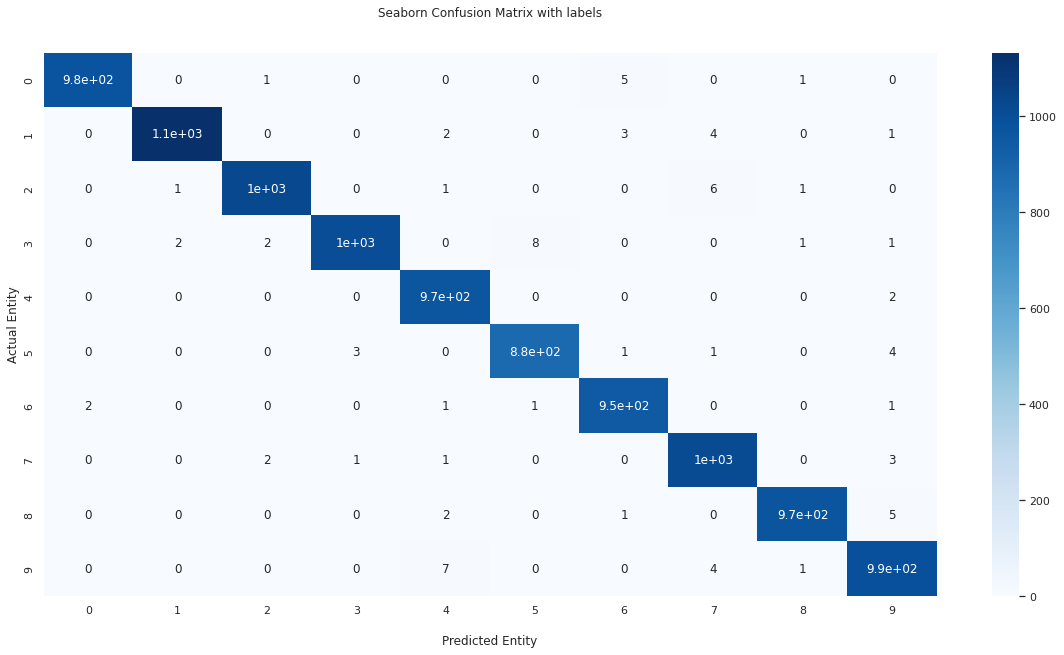

In [10]:
sns.set(rc = {'figure.figsize':(20, 10)})
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title(f'Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Entity')
ax.set_ylabel('Actual Entity')
# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])
ax.yaxis.set_ticklabels([0,1,2,3,4,5,6,7,8,9])

# Evaluation metrcis from Scratch

In [14]:
def class_conv(class_num):
  fp = 0
  fn = 0

  tp = 0
  tn = 0

  for actual_value, predicted_value in zip(y_test, prediction):
      if predicted_value == actual_value: # t?
          if predicted_value == class_num: # tp
              tp += 1
          else: # tn
              tn += 1
      else: # f?
          if predicted_value == class_num: # fp
              fp += 1
          else: # fn
              fn += 1
              
  our_confusion_matrix = [
      [tn, fp],
      [fn, tp]
  ]
  # we convert it to numpy array to be printed properly as a matrix

  our_confusion_matrix = np.array(our_confusion_matrix)
  return our_confusion_matrix, fp, fn, tp, tn

In [15]:
for i in set(y_test):
  print(f' =============== class {i} ===============')
  our_confusion_matrix, fp, fn, tp, tn = class_conv(i)
  print('Confusion matrix: ', '\n', our_confusion_matrix, '\n')
  precision = tp / (tp + fp)
  print('Precision =', precision, '\n')
  recall = tp / (tp + fn)
  print('Recall =', recall, '\n')
  f1 = (2 * precision * recall) / (precision + recall)
  print('F1 =', f1, '\n')
  

 =============== class 0 ===============
Confusion matrix:  
 [[8939    7]
 [  76  978]] 

Precision = 0.9928934010152284 

Recall = 0.9278937381404174 

F1 = 0.9592937714565962 

 =============== class 1 ===============
Confusion matrix:  
 [[8785   10]
 [  73 1132]] 

Precision = 0.9912434325744308 

Recall = 0.9394190871369295 

F1 = 0.9646357051555177 

 =============== class 2 ===============
Confusion matrix:  
 [[8890    9]
 [  74 1027]] 

Precision = 0.9913127413127413 

Recall = 0.932788374205268 

F1 = 0.9611605053813758 

 =============== class 3 ===============
Confusion matrix:  
 [[8911   14]
 [  69 1006]] 

Precision = 0.9862745098039216 

Recall = 0.935813953488372 

F1 = 0.960381861575179 

 =============== class 4 ===============
Confusion matrix:  
 [[8949    2]
 [  81  968]] 

Precision = 0.9979381443298969 

Recall = 0.9227836034318398 

F1 = 0.9588905398712234 

 =============== class 5 ===============
Confusion matrix:  
 [[9034    9]
 [  74  883]] 

Precision = 